In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/set.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [70]:
X = data.shift(1).drop('DateTime', axis=1).dropna()
X

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetimestamp
1,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,299706.0
2,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,299707.0
3,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,299708.0
4,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,299709.0
5,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,299710.0
...,...,...,...,...,...,...,...,...,...
8440,1297.0,1102.0,507.0,1375.0,1583.0,18.2,36.3,0.7487,309057.0
8441,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,309058.0
8442,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,309059.0
8443,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,309060.0


In [69]:
Y = data.shift(-1).drop(columns=['DateTime', 'datetimestamp', 'T', 'RH', 'AH']).dropna()
Y

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
0,1292.0,955.0,1174.0,1559.0,972.0
1,1402.0,939.0,1140.0,1555.0,1074.0
2,1376.0,948.0,1092.0,1584.0,1203.0
3,1272.0,836.0,1205.0,1490.0,1110.0
4,1197.0,750.0,1337.0,1393.0,949.0
...,...,...,...,...,...
8439,1314.0,1101.0,539.0,1374.0,1729.0
8440,1163.0,1027.0,604.0,1264.0,1269.0
8441,1142.0,1063.0,603.0,1241.0,1092.0
8442,1003.0,961.0,702.0,1041.0,770.0


In [71]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

# Some not knowing tests

In [78]:
model = xgb.XGBRegressor(
    booster='dart',
    tree_method='exact',
    max_depth=5,
    gamma=3,
    objective='reg:squarederror'  # Objective function for regression
)

In [73]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
results = pd.DataFrame(columns=['Model', 'mse', 'mae', 'rmse', 'mape', 'r2']).dropna()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


def appendError(model, testy, y_pred):
    # model_name = str(type(model).__name__)
    mse = mean_squared_error(testy, y_pred)
    mae = mean_absolute_error(testy, y_pred)
    rmse = root_mean_squared_error(testy, y_pred)
    mape = mean_absolute_percentage_error(testy, y_pred)
    r2 = r2_score(testy, y_pred)
    return pd.DataFrame([{
        'Model': model,
        'mse': mse, 
        'mae': mae, 
        'rmse': rmse, 
        'mape': mape, 
        'r2': r2
    }])

In [74]:
preds = model.predict(X_test)
results = pd.concat([results, appendError('PT08.S2(NMHC)', Y_test, preds)])

In [75]:
results

,Model,mse,mae,rmse,mape,r2
0,PT08.S2(NMHC),21637.193757,92.990066,113.487691,0.176543,0.638262
0,scaled,47317.514108,129.623005,150.208885,0.465632,-0.600165
0,PT08.S2(NMHC),21637.193757,92.990066,113.487691,0.176543,0.638262
0,PT08.S2(NMHC),123616.208705,159.175198,192.527952,0.126018,0.325978
0,PT08.S2(NMHC),31431.817338,138.749122,173.179675,0.164594,0.524480


In [47]:
pd.DataFrame(preds[0])

,0
0,1098.616821
1,963.139404
2,760.999634
3,1414.999390
4,960.476013
5,22.328308
6,31.682373
7,0.856812


In [48]:
Y_test.iloc[0]

PT08.S1(CO)      1176.0000
PT08.S2(NMHC)    1209.0000
PT08.S3(NOx)      588.0000
PT08.S4(NO2)     1264.0000
PT08.S5(O3)      1488.0000
T                  12.4000
RH                 28.3000
AH                  0.4076
Name: 6755, dtype: float64

In [77]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [79]:
model.fit(X_train, Y_train)
preds = model.predict(X_test)
results = pd.concat([results, appendError('scaled', Y_test, preds)])

In [80]:
results

,Model,mse,mae,rmse,mape,r2
0,PT08.S2(NMHC),21637.193757,92.990066,113.487691,0.176543,0.638262
0,scaled,47317.514108,129.623005,150.208885,0.465632,-0.600165
0,PT08.S2(NMHC),21637.193757,92.990066,113.487691,0.176543,0.638262
0,PT08.S2(NMHC),123616.208705,159.175198,192.527952,0.126018,0.325978
0,PT08.S2(NMHC),31431.817338,138.749122,173.179675,0.164594,0.524480
0,scaled,70304.270282,199.942665,232.453607,0.221695,-0.074390


In [51]:
def plotDiff(preds, y_test):
    plt.figure(figsize=(28, 8))
    plt.scatter(range(len(preds)), preds, color='red', marker='.', s=1)
    plt.scatter(range(len(preds)), y_test, color='blue', marker='.', s=1)
    for i in range(len(preds)):
        plt.plot([i, i], [preds[i], y_test.iloc[i]], color='green', linewidth=0.5)
    plt.xlabel('Index')
    plt.ylabel('y')
    plt.title('Plot of y_pred with Index as X-axis')
    plt.savefig('plot.png', dpi=300, bbox_inches='tight')
    plt.show()

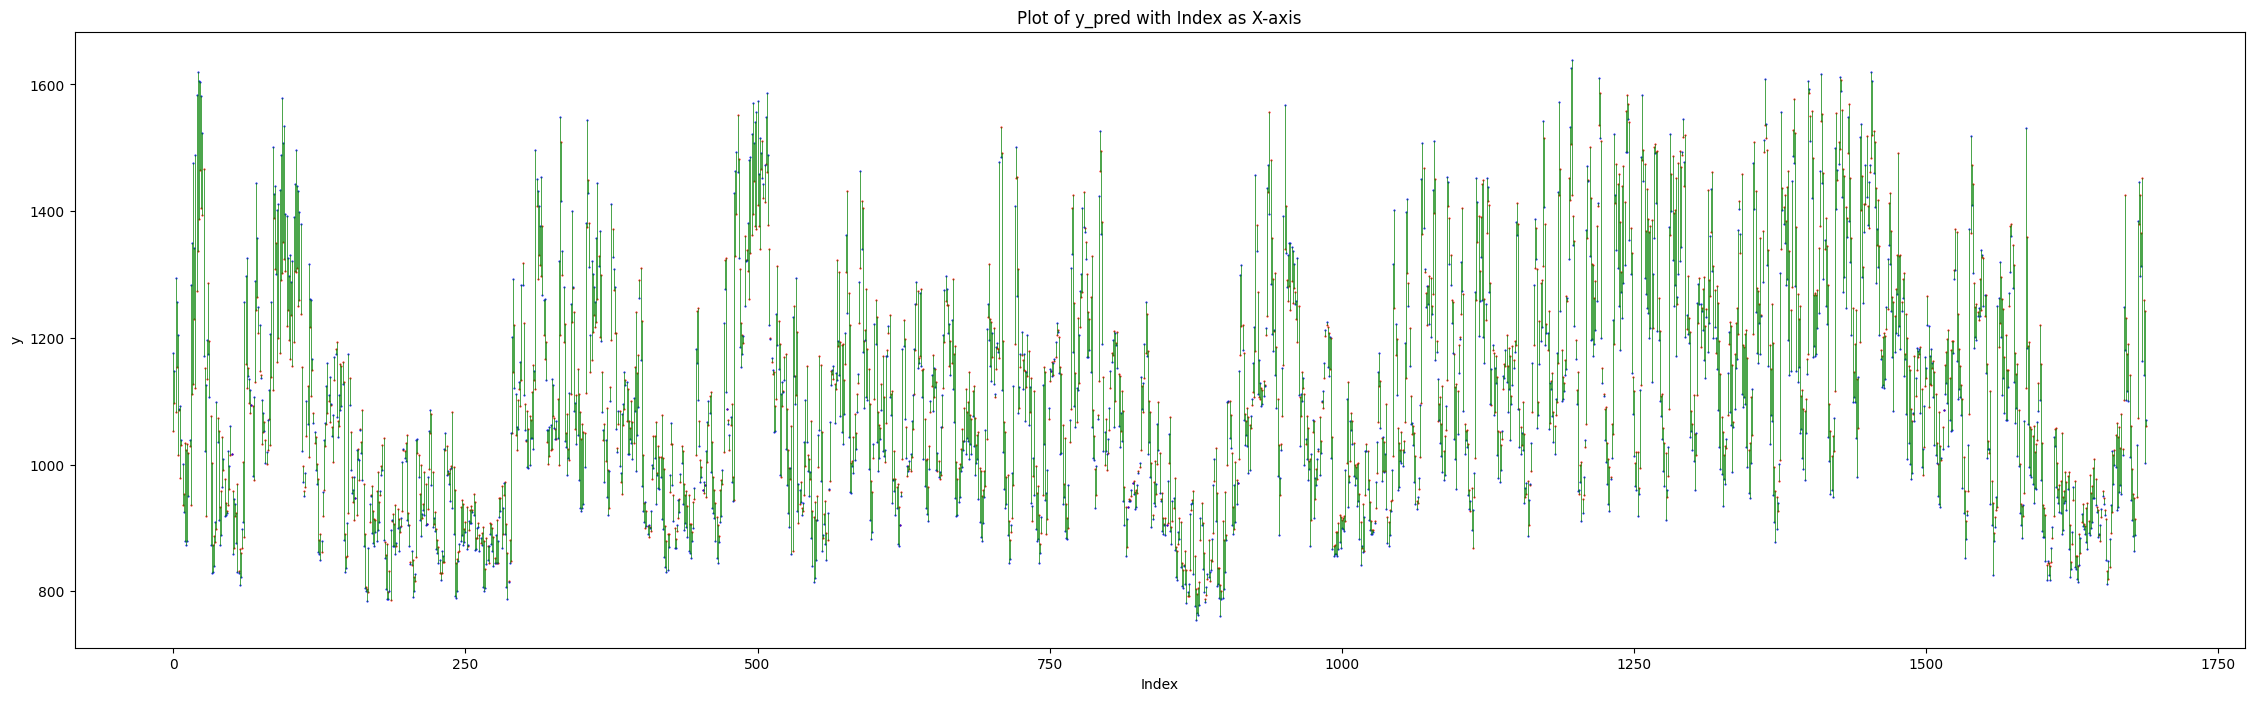

In [81]:
plotDiff(preds[:,0], Y_test.iloc[:,0])